In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_hdf("texts.hdf5", key="df", index_col=0)

In [43]:
print(
    df[
        (df.lang == "fro") & 
        (df.manuscript == "university_of_pennsylvania_660_pelerinage_mademoiselle_sapience") & 
        (df.page_id == 3) & 
        (df.line_id == 8)
    ][["transcription", "CER", "model"]].sort_values("CER").to_latex(index=False, float_format=lambda x: f"{x:.1f}")
)

print(df.model.unique().tolist(), len(df.model.unique()))

print(df.shape)

\begin{tabular}{lrl}
\toprule
                                    transcription &  CER &                          model \\
\midrule
u̾ra on de q̃l vertu ses petis pies sont que vous &  0.0 &                             GT \\
  Bra on de q̃l vertuses petis pies sont que vous &  6.1 &   data-CREMMA-Medieval.mlmodel \\
   Fra on de q̃l vertuses petis pies sont que vou &  8.2 & data-cremma-medieval\_2.mlmodel \\
  Bra on de q̃l vertuses petis pies sont que uous &  8.2 & data-cremma-medieval\_1.mlmodel \\
   Pra on de ql vertuses petis pies sont que dons & 12.2 & data-cremma-medieval\_0.mlmodel \\
  ura on de q̃l vertu ses petis pies font grre op & 16.3 &             data-bad\_3.mlmodel \\
  ura on de q̃l uertu ses petis pies font re dory & 16.3 &             data-bad\_2.mlmodel \\
   ura on de ql vertu ses petis pies font itce ir & 20.4 &             data-bad\_1.mlmodel \\
           Ard ondegl ratules nus mes sont que ls & 42.9 &     data-manumffrench2.mlmodel \\
                  a on de

/tmp/ipykernel_21719/1193254368.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df[


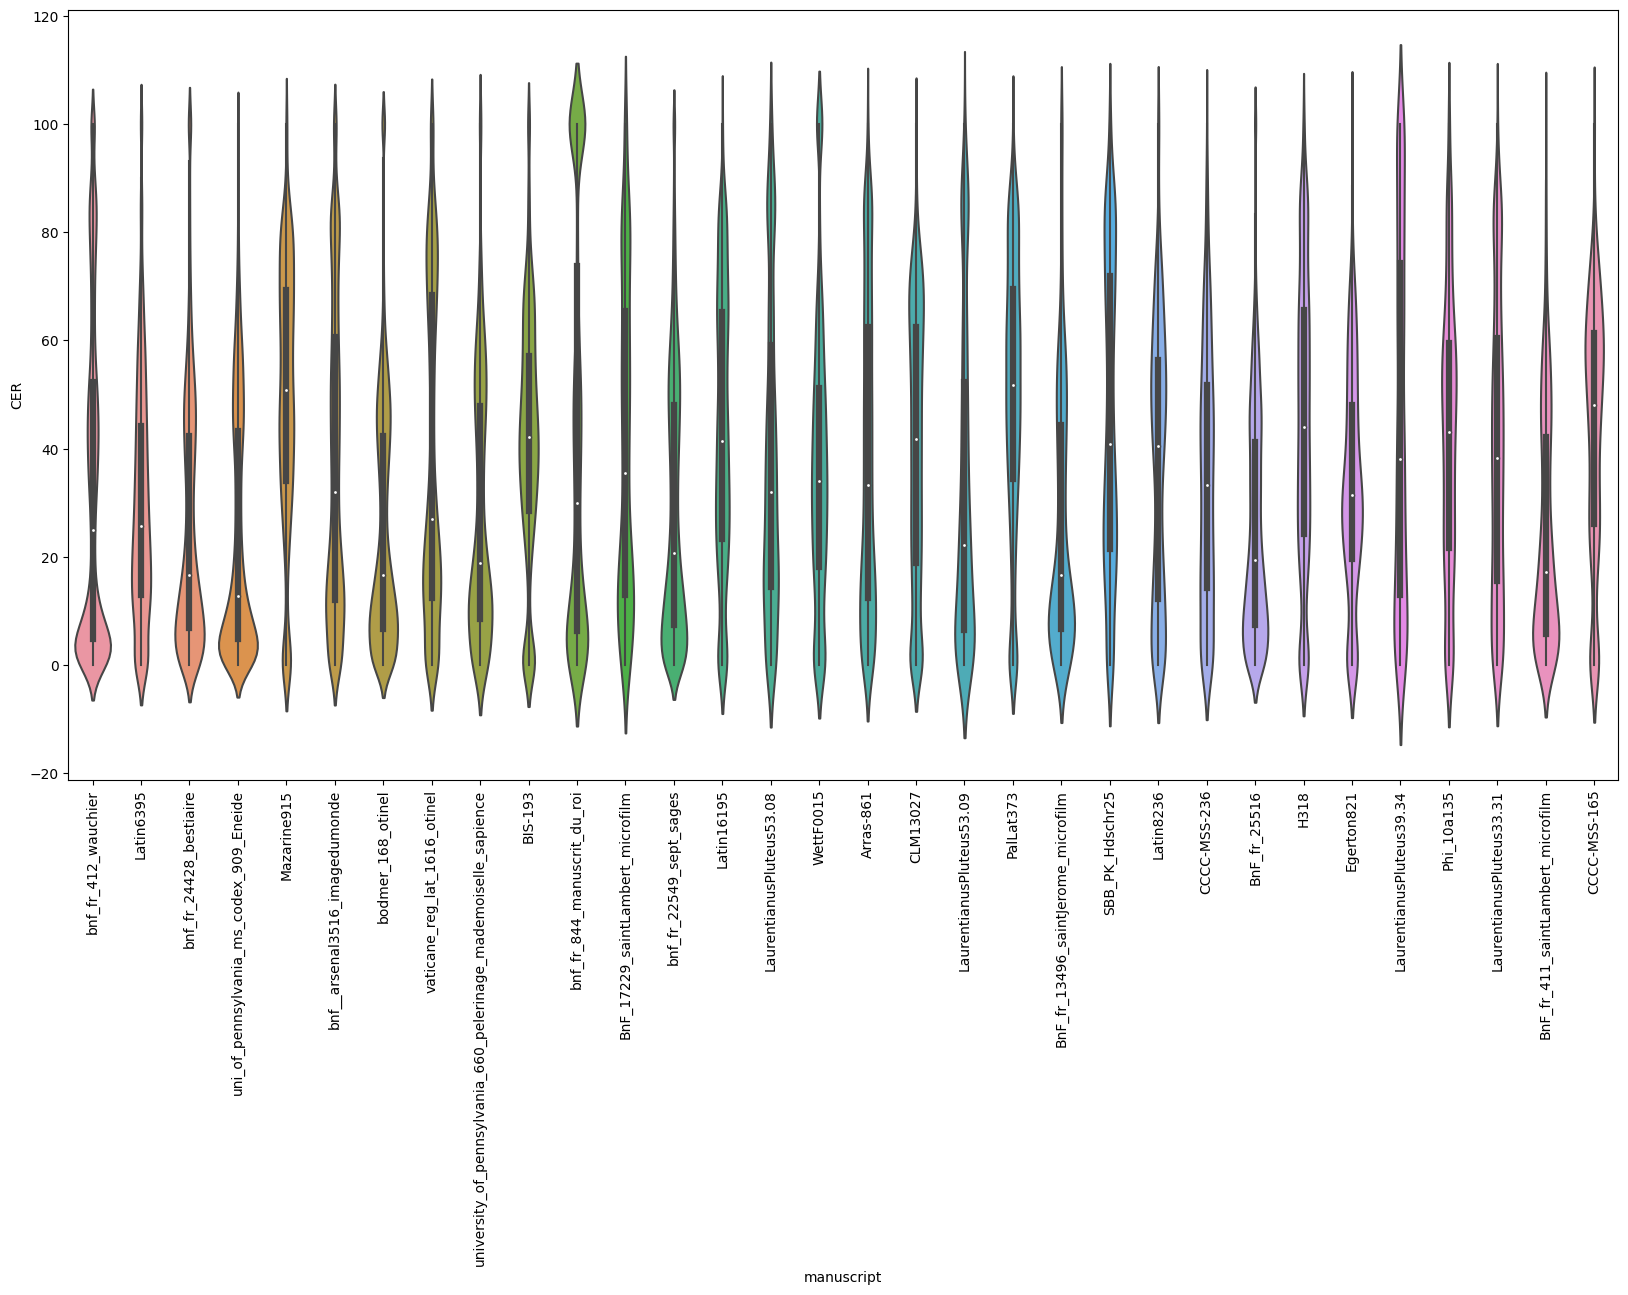

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

sns.violinplot(ax=ax, data=df, x="manuscript", y="CER")
_ = plt.xticks(rotation = 90)

<AxesSubplot:xlabel='25%', ylabel='50%'>

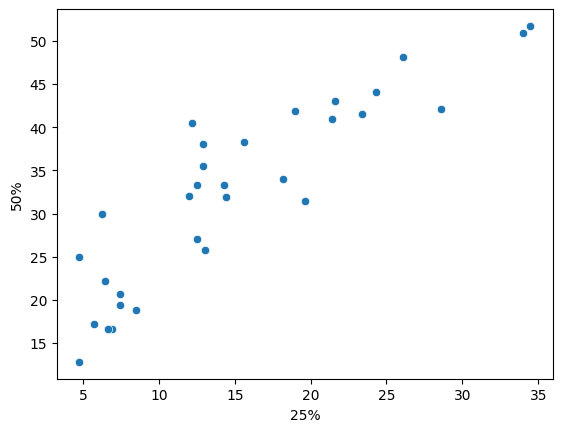

In [3]:
sns.scatterplot(data=df.groupby("manuscript")["CER"].describe(), x="25%", y="50%")

In [4]:
df["chars"] = df["transcription"].apply(lambda x: len(x))

<AxesSubplot:>

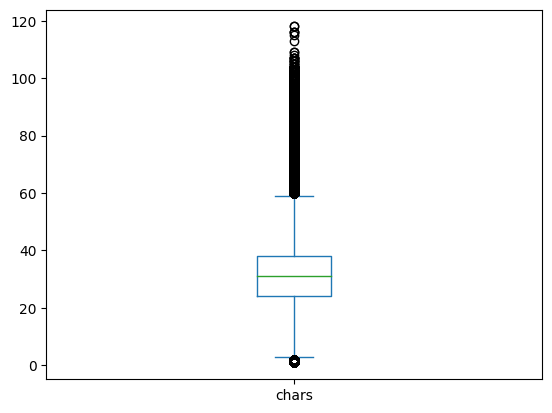

In [5]:
df.chars.plot.box()